#EDA

Reminder: in order to run specific chunks, you have to start at the top and go down. You can also hit the "Run All" button above.

## Import Packages & Google Drive Mount

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Load and Data View

Important note:

beautiful_fpl_data.shape = (27605, 61)
merged_data.shape = (10791, 179)

merged_data excludes players with 0 minutes

In [ ]:
beautiful_fpl_data = pd.read_csv('/content/drive/My Drive/STA221 Data/beautiful_fpl_data.csv')

In [ ]:
fpl_data = pd.read_csv('/content/drive/My Drive/STA221 Data/final_dataset.csv')

In [ ]:
# Remove index column
if 'Unnamed: 0' in fpl_data.columns:
  fpl_data = fpl_data.drop(columns=['Unnamed: 0'])

print(fpl_data.shape)

(27605, 169)


In [ ]:
for col in fpl_data.columns:
    print(col)

meta_fixture_event
meta_fixture_team_a
meta_fixture_finished_provisional
meta_name
meta_merger_col
target_bps
meta_fixture_provisional_start_time
meta_match-name
meta_fixture_minutes
meta_fixture_team_h_score
meta_position
meta_fixture
meta_fixture_team_a_score
meta_fixture_code
meta_fixture_team_h_difficulty
target_bonus
meta_fixture_kickoff_time
meta_fixture_finished
target_minutes
target_total_points
meta_fixture_id
meta_fixture_pulse_id
meta_fixture_team_a_difficulty
meta_fixture_started
meta_fixture_team_h
meta_fixture_stats
meta_Age
meta_mapping_name
meta_Nation
meta_Pos
meta_Away
feature_saves_last_1000_days
feature_influence_last_1000_days
feature_yellow_cards_last_1000_days
feature_was_home_last_1000_days
feature_GW_last_1000_days
feature_red_cards_last_1000_days
feature_transfers_out_last_1000_days
feature_penalties_saved_last_1000_days
feature_goals_conceded_last_1000_days
feature_modified_last_1000_days
feature_ict_index_last_1000_days
feature_penalties_missed_last_1000_day

In [ ]:
fpl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Columns: 169 entries, meta_fixture_event to feature_minutes_last_1000_days
dtypes: bool(4), float64(138), int64(14), object(13)
memory usage: 34.9+ MB


In [ ]:
fpl_data.isna().sum()

,0
meta_fixture_event,0
meta_fixture_team_a,0
meta_fixture_finished_provisional,0
meta_name,0
meta_merger_col,0
...,...
feature_Pass Types_Crs_last_1000_days,0
feature_Expected_npxG_last_1000_days,0
feature_Short_Att_last_1000_days,0
feature_Passes_Att_last_1000_days,0


In [ ]:
fpl_data.describe().T

,count,mean,std,min,25%,50%,75%,max
meta_fixture_event,27605.0,20.378337,10.911864,1.0,11.0,21.000000,30.000000,38.000000
target_bps,27605.0,4.693498,9.297526,-25.0,0.0,0.000000,6.000000,97.000000
meta_fixture_minutes,27605.0,90.000000,0.000000,90.0,90.0,90.000000,90.000000,90.000000
meta_fixture_team_h_score,27605.0,1.522152,1.282224,0.0,1.0,1.000000,2.000000,7.000000
meta_fixture,27605.0,199.153921,109.260217,1.0,106.0,204.000000,294.000000,380.000000
...,...,...,...,...,...,...,...,...
feature_Pass Types_Crs_last_1000_days,27605.0,0.056361,0.212848,0.0,0.0,0.000000,0.019570,7.811784
feature_Expected_npxG_last_1000_days,27605.0,0.004408,0.019223,0.0,0.0,0.000000,0.001244,0.611060
feature_Short_Att_last_1000_days,27605.0,0.685767,1.723847,0.0,0.0,0.019424,0.701196,38.229782
feature_Passes_Att_last_1000_days,27605.0,1.597645,3.879542,0.0,0.0,0.050320,1.678875,68.885732


In [ ]:
fpl_data.head(n=6)

,meta_fixture_event,meta_fixture_team_a,meta_fixture_finished_provisional,meta_name,meta_merger_col,target_bps,meta_fixture_provisional_start_time,meta_match-name,meta_fixture_minutes,meta_fixture_team_h_score,...,feature_Tackles_Tkl_last_1000_days,feature_Performance_Touches_last_1000_days,feature_Receiving_PrgR_last_1000_days,feature_Challenges_Tkl_last_1000_days,feature_Short_Cmp%_last_1000_days,feature_Pass Types_Crs_last_1000_days,feature_Expected_npxG_last_1000_days,feature_Short_Att_last_1000_days,feature_Passes_Att_last_1000_days,feature_minutes_last_1000_days
0,1,Bournemouth,True,Alex Scott,Alex Scott---Nott'ham Forest vs Bournemouth,11,False,Nott'ham Forest vs Bournemouth,90,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Bournemouth,True,Carlos Miguel dos Santos Pereira,Carlos Miguel dos Santos Pereira---Nott'ham Fo...,0,False,Nott'ham Forest vs Bournemouth,90,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Wolves,True,Tomiyasu Takehiro,Tomiyasu Takehiro---Arsenal vs Wolves,0,False,Arsenal vs Wolves,90,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Crystal Palace,True,Malcolm Ebiowei,Malcolm Ebiowei---Brentford vs Crystal Palace,0,False,Brentford vs Crystal Palace,90,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Southampton,True,Ben Brereton Díaz,Ben Brereton Díaz---Newcastle Utd vs Southampton,-2,False,Newcastle Utd vs Southampton,90,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,Aston Villa,True,Pau Torres,Pau Torres---West Ham vs Aston Villa,17,False,West Ham vs Aston Villa,90,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Examine Class Imbalance

In [ ]:
min_0 = round(len(fpl_data[fpl_data['target_minutes'] == 0]) / fpl_data.shape[0], 2)
min_g0 = round(len(fpl_data[fpl_data['target_minutes'] != 0]) / fpl_data.shape[0], 2)
points_0 = round(len(fpl_data[fpl_data['target_total_points'] == 0]) / fpl_data.shape[0], 2)
points_g0 = round(len(fpl_data[fpl_data['target_total_points'] != 0]) / fpl_data.shape[0], 2)

In [ ]:
pd.DataFrame([[min_0, min_g0], [points_0, points_g0]],
             index=['Total_Minutes', 'Total_Points'],
             columns=['=0', '>0'])


,=0,>0
Total_Minutes,0.58,0.42
Total_Points,0.60,0.40


<Figure size 1000x600 with 0 Axes>

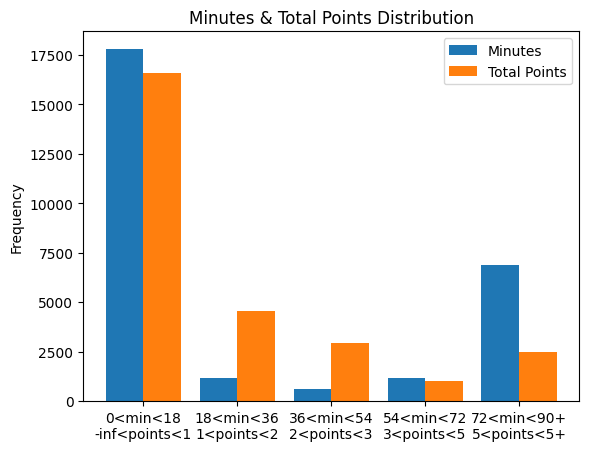

In [ ]:
point_bins = [-float('inf'), 1, 2, 3, 5, float('inf')]

minute_bins = [0, 18, 36, 54, 72, float('inf')]

mins_grouped = pd.cut(fpl_data['target_minutes'], bins=minute_bins, right=False)
points_grouped = pd.cut(fpl_data['target_total_points'], bins=point_bins, right=False)

mins_freq = mins_grouped.value_counts(sort=False).tolist()
points_freq = points_grouped.value_counts(sort=False).tolist()

plt.figure(figsize=(10, 6))

w, x = 0.4, np.arange(5)

fig, ax = plt.subplots()
ax.bar(x - w/2, mins_freq, width=w, label='Minutes')
ax.bar(x + w/2, points_freq, width=w, label='Total Points')

ax.set_xticks(x)
ax.set_xticklabels(['0<min<18\n-inf<points<1',
                    '18<min<36\n1<points<2',
                    '36<min<54\n2<points<3',
                    '54<min<72\n3<points<5',
                    '72<min<90+\n5<points<5+'])
ax.set_ylabel('Frequency')
ax.set_title('Minutes & Total Points Distribution')
ax.legend()

plt.show()

## Moving Average Data

In [ ]:

def previous_n_matches(data: pd.DataFrame, n: int, cols: list) -> pd.DataFrame:

  if n < 2:
    print("Error: previous 1 match is already present in dataframe, must perform moving average with n>=2.")
    return pd.DataFrame({})

  # Sort by name and kickoff
  df = data.sort_values(['name', 'kickoff_time'])

  # For each previous i matches for n in range(2, n+1)
  for i in range(2, n+1):

    # For each column in cols calculate col.mean()
    for col in cols:

        df[f'{col}_prev_{i}_avg'] = (
            df.groupby('name', group_keys=False)[col]
            .shift(1)  # exclude current match
            .rolling(i)
            .mean()
        )

  if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

  return df

In the below function call, we are calculating the moving average of 'creativity' for the previous n=4 matches for all players in the dataframe. This gets saved to a new dataframe fpl_data_ma. N must be >= 2 or else we are finding previous 1 match average which is already present in the dataframe. cols must be a list.

In [ ]:
# Example usage:

fpl_data_ma = previous_n_matches(data=fpl_data, n=4, cols=['assists', 'clean_sheets', 'expected_assists','expected_goal_involvements',
                                  'expected_goals','expected_goals_conceded','goals_conceded','goals_scored',
                                 'own_goals', 'penalties_missed','penalties_saved','red_cards','saves','yellow_cards',
                                 'creativity', 'influence','threat', 'total_points'])

KeyError: 'name'

When viewing the fpl_data_ma, we can see on the right hand side is the column for 'creativity_prev_2'.

In [ ]:
fpl_data_ma.head(n=10)

## Histograms & Correlation Preview

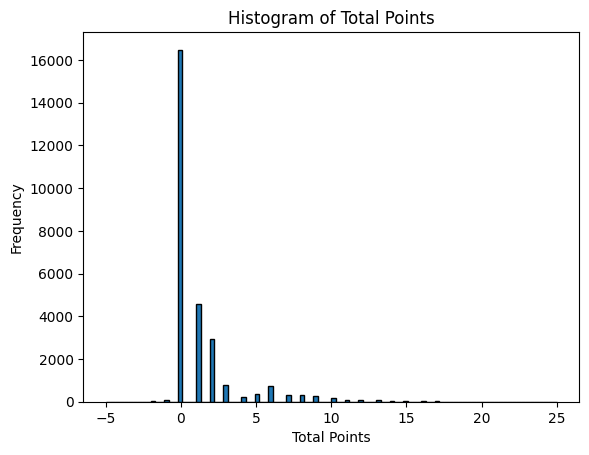

count    27605.000000
mean         1.200906
std          2.416882
min         -5.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         25.000000
Name: target_total_points, dtype: float64


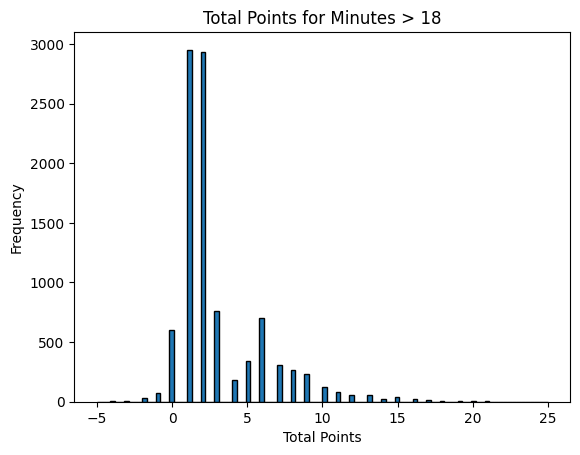

count    9819.000000
mean        2.975863
std         3.027162
min        -5.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        25.000000
Name: target_total_points, dtype: float64


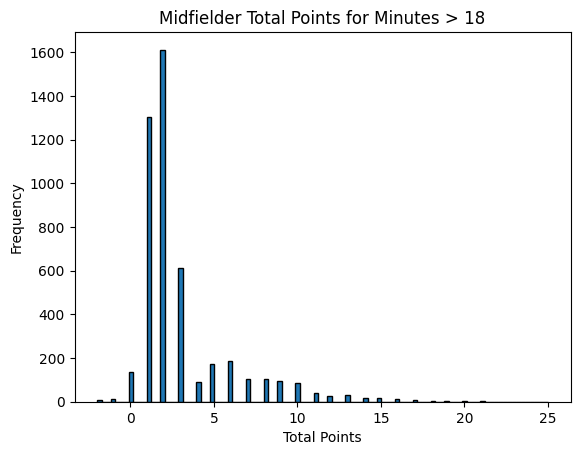

count    4682.000000
mean        3.024562
std         3.013966
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        25.000000
Name: target_total_points, dtype: float64


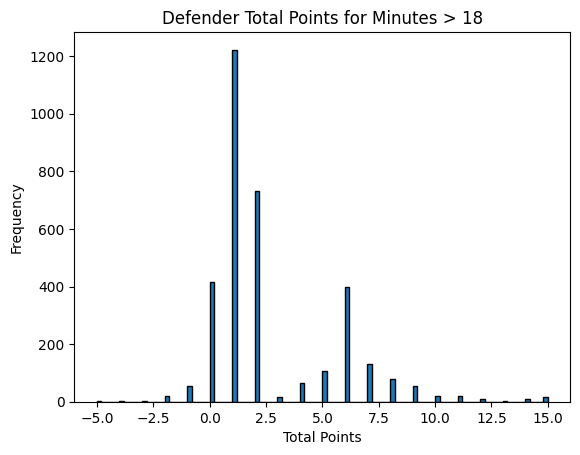

count    3383.000000
mean        2.601833
std         2.850019
min        -5.000000
25%         1.000000
50%         1.000000
75%         5.000000
max        15.000000
Name: target_total_points, dtype: float64


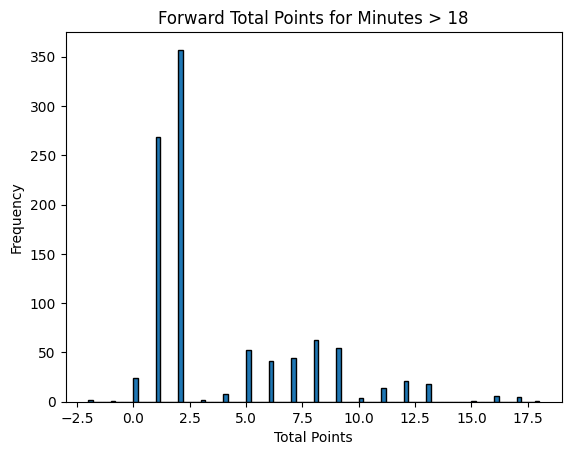

count    986.000000
mean       3.765720
std        3.618464
min       -2.000000
25%        1.000000
50%        2.000000
75%        6.000000
max       18.000000
Name: target_total_points, dtype: float64


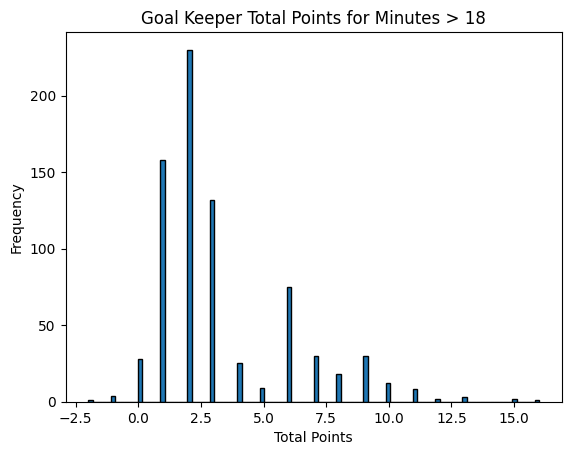

count    768.000000
mean       3.312500
std        2.771855
min       -2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       16.000000
Name: target_total_points, dtype: float64


In [ ]:
# Histograms of total points

# Create a histogram and print the descriptive statistics of total points column in fpl_data
total_points_column = fpl_data['target_total_points']
plt.hist(total_points_column, bins=100, edgecolor='black')
plt.title('Histogram of Total Points')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()
#fpl_data_dataframe['total_points'].describe()
print(total_points_column.describe())

# looking at all players total points with  half or more played
total_points_with_half_played = fpl_data[fpl_data['target_minutes'] >= 18]['target_total_points']
plt.hist(total_points_with_half_played, bins=100, edgecolor='black')
plt.title('Total Points for Minutes > 18')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()
print(total_points_with_half_played.describe())

# looking at mids total points with  half or more played
total_points_half_mid = fpl_data[(fpl_data['target_minutes'] >= 18) & (fpl_data['meta_position'] == 'MID')]['target_total_points']
plt.hist(total_points_half_mid, bins=100, edgecolor='black')
plt.title('Midfielder Total Points for Minutes > 18')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()
print(total_points_half_mid.describe())

# looking at defs total points with  half or more played
total_points_half_def = fpl_data[(fpl_data['target_minutes'] >= 18) & (fpl_data['meta_position'] == 'DEF')]['target_total_points']
plt.hist(total_points_half_def, bins=100, edgecolor='black')
plt.title('Defender Total Points for Minutes > 18')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()
print(total_points_half_def.describe())


#looking at fowards total points with  half or more played
total_points_half_fwd = fpl_data[(fpl_data['target_minutes'] >= 18) & (fpl_data['meta_position'] == 'FWD')]['target_total_points']
plt.hist(total_points_half_fwd, bins=100, edgecolor='black')
plt.title('Forward Total Points for Minutes > 18')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()
print(total_points_half_fwd.describe())

#looking at goalkeeps total points with half or more played
total_points_half_gk = fpl_data[(fpl_data['target_minutes'] >= 18) & (fpl_data['meta_position'] == 'GK')]['target_total_points']
plt.hist(total_points_half_gk, bins=100, edgecolor='black')
plt.title('Goal Keeper Total Points for Minutes > 18')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()
print(total_points_half_gk.describe())

In [ ]:
# filter the columns wanted and store in a new data frame

columns_for_correlation_matrix = ['target_total_points', 'feature_Goals_last_1000_days']

dataframe_for_correlation_matrix = fpl_data[columns_for_correlation_matrix]
# would be better in a function but whatever print highly positively correlated and then negatively correlated
correlation_matrix = dataframe_for_correlation_matrix.corr()

#check positively correlated
for i in range(len(correlation_matrix.columns)):
  for j in range(i+1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) >= 0.7:
      print(f"Correlation between {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} is {correlation_matrix.iloc[i, j]:.2f}")


# check negatively correlated
for i in range(len(correlation_matrix.columns)):
  for j in range(i+1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) <= -.7:
      print(f"Correlation between {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} is {correlation_matrix.iloc[i, j]:.2f}")

KeyError: "['feature_Goals_last_1000_days'] not in index"

## Group DF by Position with Moving Average

In [ ]:
fpl_data_mid = fpl_data[fpl_data['meta_position'] == 'MID']
fpl_data_def = fpl_data[fpl_data['meta_position'] == 'DEF']
fpl_data_fwd = fpl_data[fpl_data['meta_position'] == 'FWD']
fpl_data_gk = fpl_data[fpl_data['meta_position'] == 'GK']

print('fpl_data_mid.shape: ', fpl_data_mid.shape,
      '\nfpl_data_def.shape: ', fpl_data_def.shape,
      '\nfpl_data_fwd.shape: ', fpl_data_fwd.shape,
      '\nfpl_data_gk.shape: ', fpl_data_gk.shape)

# Can update columns used in MA.

fpl_data_mid_ma = previous_n_matches(fpl_data_mid, n=2, cols=['assists', 'creativity', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'goals_scored', 'influence',
                                                              'minutes', 'threat', 'total_points'])
fpl_data_def_ma = previous_n_matches(fpl_data_def, n=2, cols=['creativity', 'expected_goal_involvements', 'influence', 'minutes', 'threat', 'total_points', 'expected_goals_conceded', 'goals_conceded'])
fpl_data_fwd_ma = previous_n_matches(fpl_data_fwd, n=2, cols=['assists', 'creativity', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'goals_scored', 'influence',
                                                              'minutes', 'threat', 'total_points'])
fpl_data_gk_ma = previous_n_matches(fpl_data_gk, n=2, cols=['influence', 'clean_sheets', 'minutes', 'total_points', 'expected_goals_conceded', 'goals_conceded', 'saves', 'yellow_cards'])

## Correlation Matrices Grouped by Position

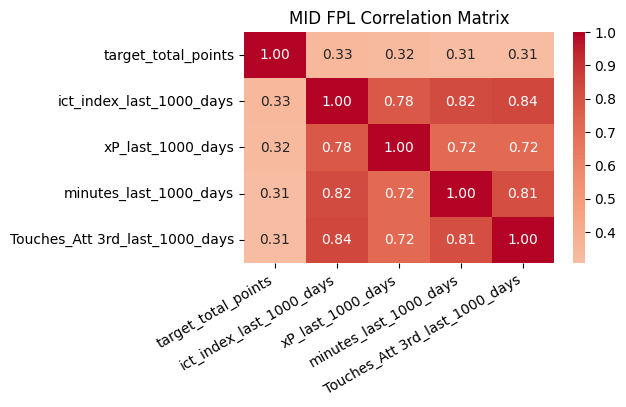

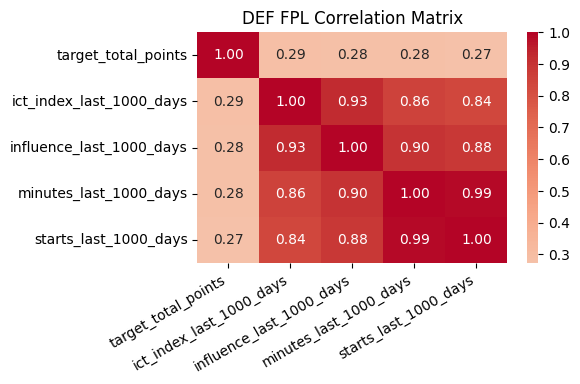

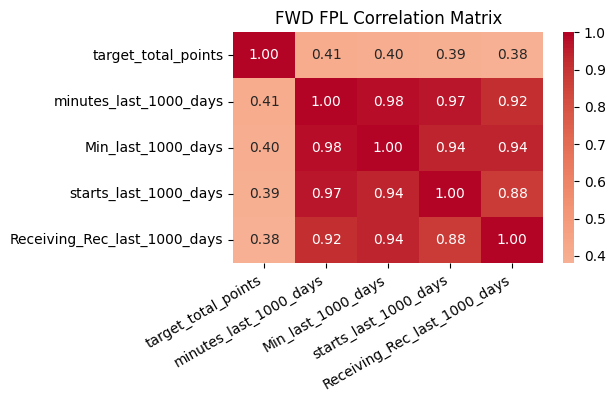

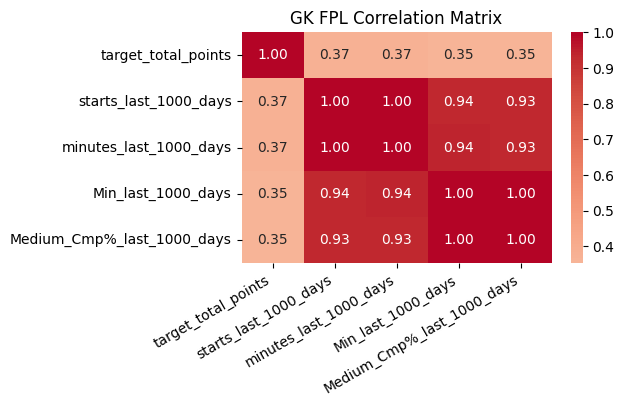

In [ ]:
cor_cols = []

for col in fpl_data.columns:
  if col[:7] == 'feature':
    cor_cols.append(col)

cor_cols.append('target_total_points')

for pos in ['MID', 'DEF', 'FWD', 'GK']:

  fpl_data_pos = fpl_data[fpl_data['meta_position'] == pos]
  fpl_data_pos_cor = fpl_data_pos[[c for c in cor_cols]]

  pos_cor = fpl_data_pos_cor.corr()

  corr_target = pos_cor['target_total_points']
  sig_cols = corr_target.abs().sort_values(ascending=False).head(5).index.tolist()
  pos_cor = pos_cor.loc[sig_cols, sig_cols]

  pos_cor = pos_cor.rename(
      columns=lambda x: x.replace('feature_', '')
  )
  pos_cor = pos_cor.rename(
      index=lambda x: x.replace('feature_', '')  # also remove from row names if square matrix
  )

  plt.figure(figsize=(5, 3))
  sns.heatmap(
      pos_cor,
      annot=True,
      fmt=".2f",
      cmap="coolwarm",
      center=0
  )
  plt.xticks(rotation=30, ha='right')
  plt.title(f"{pos} FPL Correlation Matrix")
  plt.show()

Print the features most highly correlated with total_points for each position group

## Scatter plots for total_points by position

Create scatter plots of highly correlated variables and response total_points for each position group

In [ ]:
fpl_data_mid = fpl_data[fpl_data['meta_position'] == 'MID']
fpl_data_def = fpl_data[fpl_data['meta_position'] == 'DEF']
fpl_data_fwd = fpl_data[fpl_data['meta_position'] == 'FWD']
fpl_data_gk = fpl_data[fpl_data['meta_position'] == 'GK']

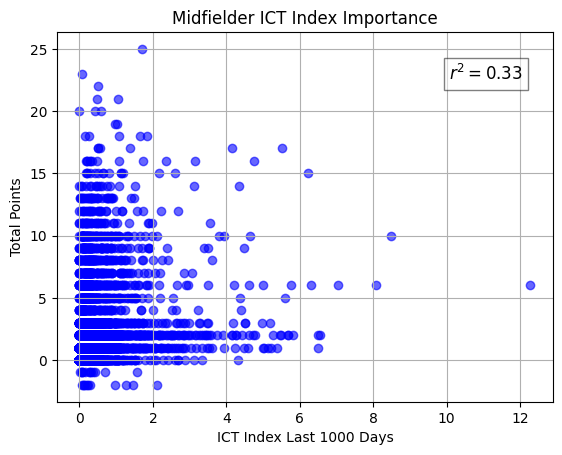

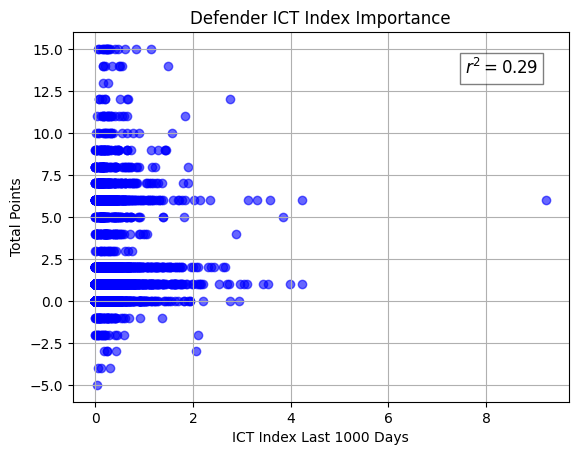

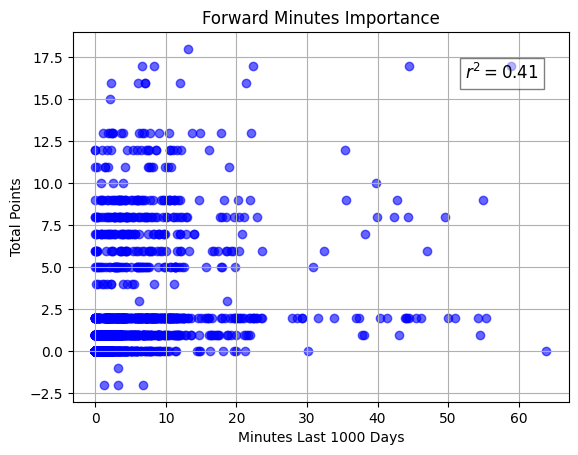

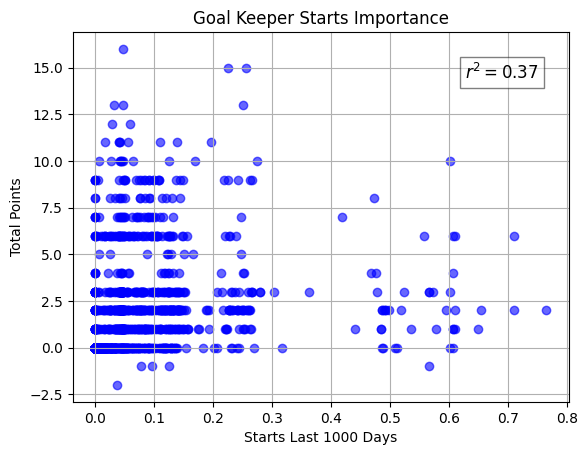

In [ ]:
# Midfielder

x = fpl_data_mid['feature_ict_index_last_1000_days'].values.reshape(-1, 1)
y = fpl_data_mid['target_total_points'].values.reshape(-1, 1)
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel('ICT Index Last 1000 Days')
plt.ylabel('Total Points')
plt.title('Midfielder ICT Index Importance')
plt.grid(True)
model = LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)
plt.text(
    max(x)*0.82,
    max(y)*0.9,
    f'$r^2 = {np.sqrt(r2):.2f}$',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.show()

# Defender

x = fpl_data_def['feature_ict_index_last_1000_days'].values.reshape(-1, 1)
y = fpl_data_def['target_total_points'].values.reshape(-1, 1)
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel('ICT Index Last 1000 Days')
plt.ylabel('Total Points')
plt.title('Defender ICT Index Importance')
plt.grid(True)
model = LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)
plt.text(
    max(x)*0.82,
    max(y)*0.9,
    f'$r^2 = {np.sqrt(r2):.2f}$',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.show()

# Forward

x = fpl_data_fwd['feature_minutes_last_1000_days'].values.reshape(-1, 1)
y = fpl_data_fwd['target_total_points'].values.reshape(-1, 1)
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel('Minutes Last 1000 Days')
plt.ylabel('Total Points')
plt.title('Forward Minutes Importance')
plt.grid(True)
model = LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)
plt.text(
    max(x)*0.82,
    max(y)*0.9,
    f'$r^2 = {np.sqrt(r2):.2f}$',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.show()

# Goal Keeper

x = fpl_data_gk['feature_starts_last_1000_days'].values.reshape(-1, 1)
y = fpl_data_gk['target_total_points'].values.reshape(-1, 1)
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel('Starts Last 1000 Days')
plt.ylabel('Total Points')
plt.title('Goal Keeper Starts Importance')
plt.grid(True)
model = LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)
plt.text(
    max(x)*0.82,
    max(y)*0.9,
    f'$r^2 = {np.sqrt(r2):.2f}$',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.show()

NameError: name 'high_corr_features_mid' is not defined

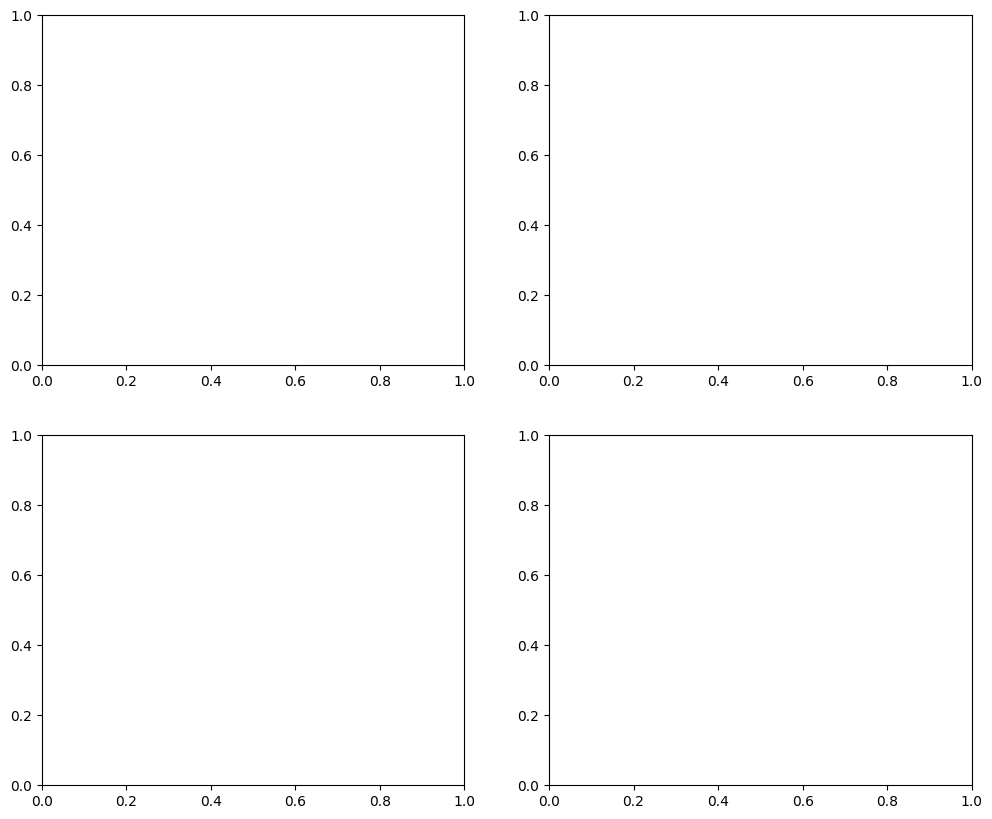

In [ ]:
# Midfielders
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(['bps', 'influence', 'goals_scored', 'bonus']):
    corr_val = high_corr_features_mid[col]
    axes[i].scatter(fpl_data_mid_ma[col], fpl_data_mid_ma['total_points'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('total_points')
    axes[i].set_title(f'Midfielder {col} vs total_points')
    axes[i].text(
        0.02, 0.98,
        f"corr = {corr_val:.4f}",
        transform=axes[i].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="white", alpha=0.6)
    )
plt.tight_layout()
plt.show()

# Defenders
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(['bps', 'clean_sheets', 'influence', 'xP']):
    corr_val = high_corr_features_def[col]
    axes[i].scatter(fpl_data_def_ma[col], fpl_data_def_ma['total_points'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('total_points')
    axes[i].set_title(f'Defender {col} vs total_points')
    axes[i].text(
        0.02, 0.98,
        f"corr = {corr_val:.4f}",
        transform=axes[i].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="white", alpha=0.6)
    )
plt.tight_layout()
plt.show()

# Forwards
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(['bps', 'influence', 'goals_scored', 'bonus']):
    corr_val = high_corr_features_fwd[col]
    axes[i].scatter(fpl_data_fwd_ma[col], fpl_data_fwd_ma['total_points'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('total_points')
    axes[i].set_title(f'Forward {col} vs total_points')
    axes[i].text(
        0.02, 0.98,
        f"corr = {corr_val:.4f}",
        transform=axes[i].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="white", alpha=0.6)
    )
plt.tight_layout()
plt.show()

# Goal Keepers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(['bps', 'clean_sheets', 'influence', 'minutes']):
    corr_val = high_corr_features_gk[col]
    axes[i].scatter(fpl_data_gk_ma[col], fpl_data_gk_ma['total_points'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('total_points')
    axes[i].set_title(f'Goal Keeper {col} vs total_points')
    axes[i].text(
        0.02, 0.98,
        f"corr = {corr_val:.4f}",
        transform=axes[i].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="white", alpha=0.6)
    )
plt.tight_layout()
plt.show()

## Average Total Points by Position with a minutes played adjustment

In [ ]:
import math

minutes_played = 45

if "position" in fpl_data.columns and "total_points" in fpl_data.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(data=fpl_data[fpl_data['minutes'] >= minutes_played], x="position", y="total_points", estimator=np.mean, ci=None)
    title = f"Average Total Points by Position with more than {minutes_played} minutes played"
    plt.title(title)
    plt.tight_layout()
    plt.show()


## Goals by Team and Clean sheets by team (clean sheets needs to be checked)




In [ ]:
if "team" in fpl_data.columns:
    if "goals_scored" in fpl_data.columns:
        team_attack = fpl_data.groupby("team")["goals_scored"].sum().sort_values(ascending=False)
        plt.figure(figsize=(10,5))
        team_attack.plot(kind="bar")
        plt.title("Total Goals Scored by Team (All Players Combined)")
        plt.ylabel("Goals Scored")
        plt.tight_layout()
        plt.show()

    if "goals_conceded" in fpl_data.columns:
        team_def = fpl_data.groupby("team")["goals_conceded"].sum().sort_values()
        plt.figure(figsize=(10,5))
        team_def.plot(kind="bar")
        plt.title("Total Goals Conceded by Team (All Players Combined)")
        plt.ylabel("Goals Conceded")
        plt.tight_layout()
        plt.show()

        if "clean_sheets" in fpl_data.columns:
          team_def = fpl_data.groupby(["team", "match-name"])['clean_sheets'].max().reset_index() # to not overcount per player cleansheets
          team_clean_sheets = team_def.groupby("team")['clean_sheets'].sum().sort_values() # sum the values per team
          plt.figure(figsize=(10,5))
          team_clean_sheets.plot(kind="bar")
          plt.title("Total Clean Sheets by team")
          plt.ylabel("Number of Clean sheets")
          plt.tight_layout()
          plt.show()


## Outlier Detection

In [ ]:
numeric_cols = ['xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'goals_conceded', 'goals_scored',
       'influence', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'threat', 'total_points', 'value', 'yellow_cards']

n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(4 * n_cols, 3 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=fpl_data[col])
    plt.title(col)
    plt.xlabel("")
plt.tight_layout()
plt.show()


## Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

target = "total_points"
feature_cols = [c for c in numeric_cols if c != target]

# Drop rows with NaNs in features/target
model_df = fpl_data_ma[feature_cols + [target]].dropna()
X = model_df[feature_cols]
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

importance = pd.Series(rf.feature_importances_, index=feature_cols)
importance_sorted = importance.sort_values()

plt.figure(figsize=(8,6))
importance_sorted.plot(kind="barh")
plt.title("Random Forest Feature Importance for Total Points")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

print("Top important features:")
display(importance_sorted.sort_values(ascending=False).head(10))


## Top 10 over and underperformers

In [ ]:
fpl_data['actual_contrib'] = fpl_data['goals_scored'] + fpl_data['assists']
fpl_data['expected_contrib'] = fpl_data['expected_goals'] + fpl_data['expected_assists']

# Overperformance
fpl_data['overperformance'] = fpl_data['actual_contrib'] - fpl_data['expected_contrib']

# Aggregate by player
player_perf = (
    fpl_data.groupby('name')['overperformance']
    .sum()  # total over the season
    .sort_values(ascending=False)
)

# Top 10 overperformers
top10 = player_perf.head(10)

# Bottom 10 (most underperforming)
bottom10 = player_perf.tail(10)

print('top10\n', top10)
print('\nbottom10\n', bottom10)

## Binary classification for minutes played

### XGBoost

In [ ]:
for col in fpl_data.columns:
  if col[:6] == 'target':
    print(col)

target_bps
target_bonus
target_minutes
target_total_points


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

In [ ]:
accuracies = {}

In [ ]:
x = fpl_data.drop(columns=['target_minutes', 'target_bps', 'target_bonus', 'target_total_points'])
y = (fpl_data['target_minutes'] > 0).astype(int)

# Drop meta columns
x = x.drop(columns=[c for c in x.columns if c.startswith('meta')])

# x = previous_n_matches(data=x, n=4, cols=[''])

x_train = x.iloc[:int(len(x)*0.8)]
y_train = y.iloc[:int(len(y)*0.8)]
x_test = x.iloc[int(len(x)*0.8):]
y_test = y.iloc[int(len(x)*0.8):]

In [ ]:
# XGBoost

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    scale_pos_weight=pos_weight,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

_ = model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

accuracies['XGBoost'] = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Minutes=0', 'Minutes>0'],
                     columns=['Predicted_minutes=0', 'predicted_minutes>0'])
cm_df

Accuracy: 0.877196160115921


,Predicted_minutes=0,predicted_minutes>0
Minutes=0,2982,418
Minutes>0,260,1861


### Logistic Regression (Ridge, LASSO, Elastic Net)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Ridge

model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=500
)

_ = model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

accuracies['Logistic L2'] = accuracy_score(y_test, y_pred)

Accuracy: 0.8340880275312443


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Stricter Ridge

model = LogisticRegression(
    penalty='l2',
    C=0.1,  # Stricter
    solver='lbfgs',
    max_iter=500
)

_ = model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

accuracies['Logistic L2 (stronger regularization)'] = accuracy_score(y_test, y_pred)

Accuracy: 0.8473102698786452


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# LASSO

lasso = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.1,
    max_iter=500
)

lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

accuracies['Logistic L1'] = accuracy_score(y_test, y_pred)

Accuracy: 0.8183300126788625


In [ ]:
# Elastic Net

enet = LogisticRegression(
    penalty='elasticnet',
    l1_ratio=0.5,
    solver='saga',
    max_iter=500
)

enet.fit(x_train, y_train)

y_pred = enet.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

accuracies['Logistic (Elastic Net penalty)'] = accuracy_score(y_test, y_pred)

Accuracy: 0.3876109400470929


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

,Model,Accuracy
0,XGBoost,0.877196
1,Logistic L2,0.834088
2,Logistic L2 (stronger regularization),0.847310
3,Logistic L1,0.818330
4,Logistic (Elastic Net penalty),0.387611
